![insomnia](insomnia.jpg)


Your client, SleepInc, has shared anonymized sleep data from their hot new sleep tracking app SleepScope. As their data science consultant, your mission is to analyze the lifestyle survey data with Python to discover relationships between exercise, gender, occupation, and sleep quality. See if you can identify patterns leading to insights on sleep quality.

## 💾 The data: sleep_health_data.csv

SleepInc has provided you with an anonymized dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months. The data is saved as `sleep_health_data.csv`.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

#### 1. Which occupation has the lowest average sleep duration? Save this in a string variable called lowest_sleep_occ.

#### 2. Which occupation has the lowest average sleep quality? Save this in a string variable called lowest_sleep_quality_occ. Did the occupation with the lowest sleep duration also have the lowest sleep quality? If so assign a boolean value to variable same_occ variable, True if it is the same occupation, and False if it isn't.

#### 3. Let's explore how BMI Category can affect sleep disorder rates. Start by finding what ratio of app users in each BMI Category have been diagnosed with Insomnia. Create a dictionary named: bmi_insomnia_ratios. The key should be the BMI Category as a string, while the value should be the ratio of people in this category with insomnia as a float rounded to two decimal places. Here is an example:

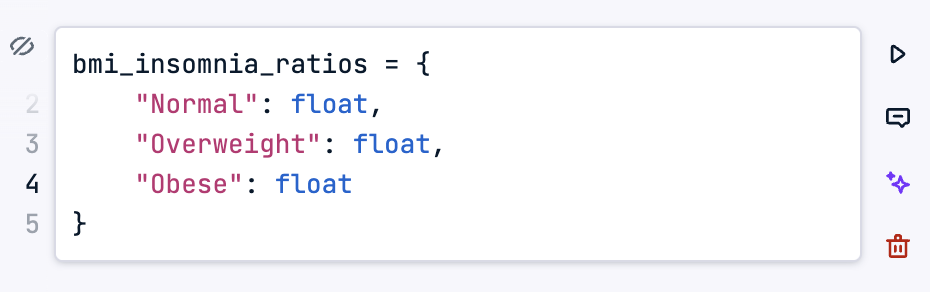

#### Please note the keys are case-sensitive, and should be formatted as shown in the example dictionary.

In [409]:
# Start coding here
# Use as many cells as you need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [410]:
sleep_health_data = pd.read_csv('sleep_health_data.csv')

sleep_health_data['Sleep Disorder'] = sleep_health_data['Sleep Disorder'].fillna('None')

print(sleep_health_data['Sleep Disorder'].value_counts())

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


#### Question 1

In [411]:
filtered_occ_dur = sleep_health_data.groupby('Occupation', as_index=False)['Sleep Duration'].mean().sort_values(by = 'Sleep Duration', ascending=True)

lowest_sleep_occ = filtered_occ_dur['Occupation'].iloc[0]

print(filtered_occ_dur)
print(lowest_sleep_occ)

              Occupation  Sleep Duration
6   Sales Representative        5.900000
8              Scientist        6.000000
7            Salesperson        6.403125
10               Teacher        6.690000
9      Software Engineer        6.750000
4                Manager        6.900000
1                 Doctor        6.970423
5                  Nurse        7.063014
0             Accountant        7.113514
3                 Lawyer        7.410638
2               Engineer        7.987302
Sales Representative


#### Question 2

In [412]:
filtered_occ_qual = sleep_health_data.groupby('Occupation', as_index=False)['Quality of Sleep'].mean().sort_values(by = 'Quality of Sleep', ascending=True)

lowest_sleep_quality_occ = filtered_occ_qual['Occupation'].iloc[0]

print(filtered_occ_qual)
print(lowest_sleep_quality_occ)

              Occupation  Quality of Sleep
6   Sales Representative          4.000000
8              Scientist          5.000000
7            Salesperson          6.000000
9      Software Engineer          6.500000
1                 Doctor          6.647887
10               Teacher          6.975000
4                Manager          7.000000
5                  Nurse          7.369863
0             Accountant          7.891892
3                 Lawyer          7.893617
2               Engineer          8.412698
Sales Representative


In [413]:
if lowest_sleep_quality_occ == lowest_sleep_occ:
    same_occ = True
else:
    same_occ = False

In [414]:
print(same_occ)

True


#### Question 3

In [415]:
sleep_health_data['Insom_Status_True'] = sleep_health_data['Sleep Disorder'] == 'Insomnia'

print(sleep_health_data)

     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

In [416]:
sorted_insomn = sleep_health_data.groupby('BMI Category', as_index= False)['Insom_Status_True'].sum().sort_values(by = 'BMI Category')

print(sorted_insomn)

  BMI Category  Insom_Status_True
0       Normal                  9
1        Obese                  4
2   Overweight                 64


In [417]:
sorted_bmi = sleep_health_data['BMI Category'].value_counts().reset_index().sort_values(by = 'BMI Category')

print(sorted_bmi)

  BMI Category  count
0       Normal    216
2        Obese     10
1   Overweight    148


In [418]:
merged_bmi_insom = sorted_bmi.merge(sorted_insomn, on = 'BMI Category')

merged_bmi_insom['Ratio'] = (merged_bmi_insom['Insom_Status_True'] / merged_bmi_insom['count']).round(2)

print(merged_bmi_insom)

  BMI Category  count  Insom_Status_True  Ratio
0       Normal    216                  9   0.04
1        Obese     10                  4   0.40
2   Overweight    148                 64   0.43


In [419]:
bmi_insomnia_ratios = dict(zip(merged_bmi_insom['BMI Category'], merged_bmi_insom['Ratio']))

print(bmi_insomnia_ratios)

{'Normal': 0.04, 'Obese': 0.4, 'Overweight': 0.43}


In [420]:
print(sorted_insomn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BMI Category       3 non-null      object
 1   Insom_Status_True  3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes
None
